In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Sales=pd.read_csv("https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv",parse_dates=["Date"])

In [4]:
Sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


# Data at a glance

In [5]:
Sales.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [6]:
Sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [7]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [8]:
Sales.shape

(113036, 18)

In [9]:
#Numerical Analysis and Visualization

In [10]:
Sales['Unit_Price'].describe()

count    113036.000000
mean        452.938427
std         922.071219
min           2.000000
25%           5.000000
50%          24.000000
75%          70.000000
max        3578.000000
Name: Unit_Price, dtype: float64

<AxesSubplot:>

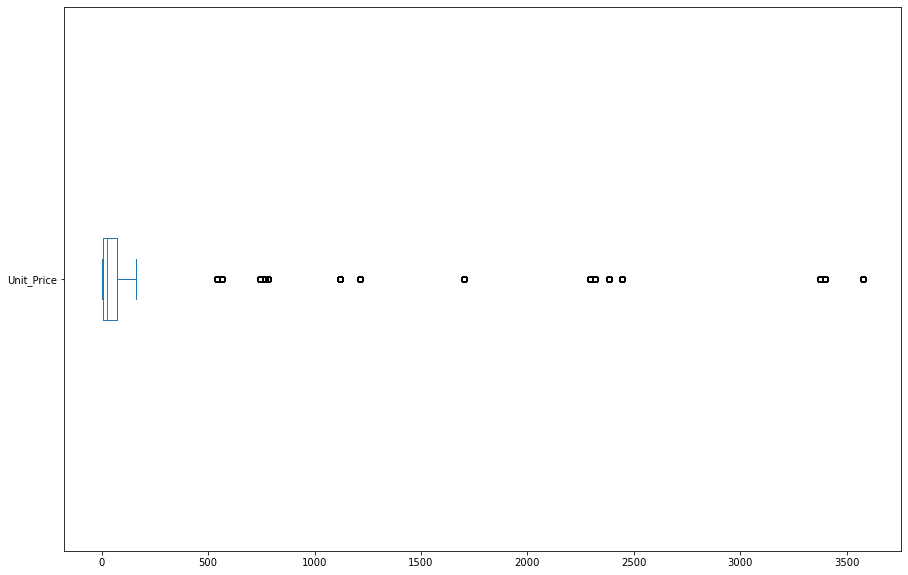

In [11]:
Sales['Unit_Price'].plot(kind="box",vert=False,figsize=(15,10))

<AxesSubplot:ylabel='Density'>

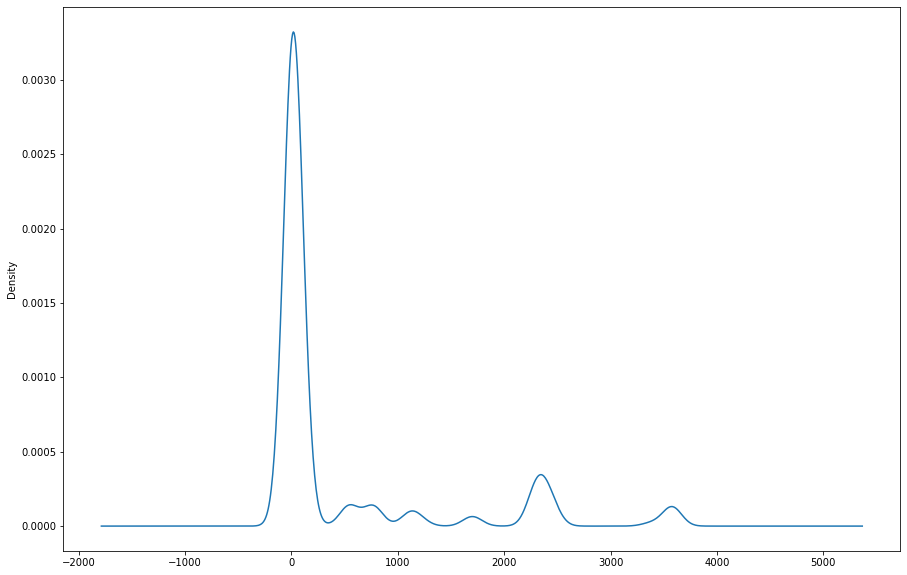

In [12]:
Sales['Unit_Price'].plot(kind="density",figsize=(15,10))

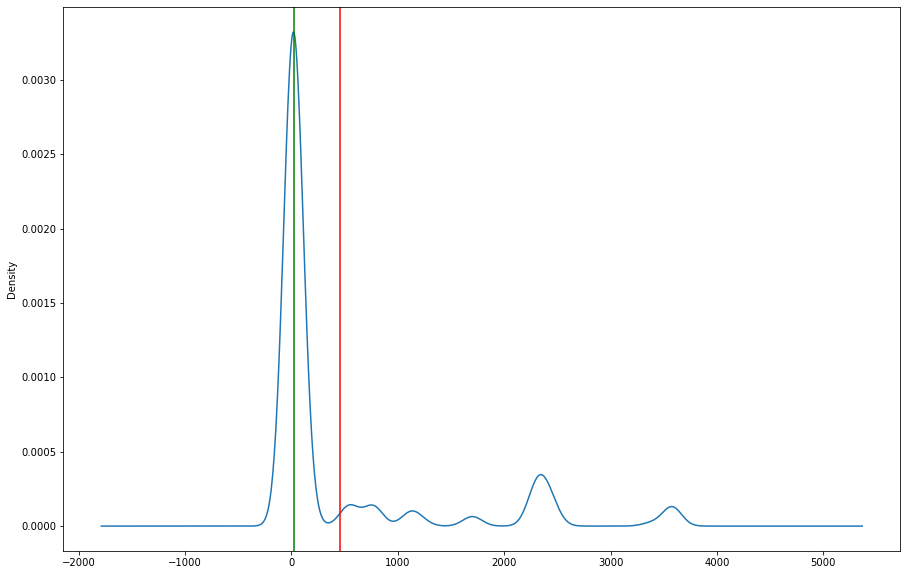

In [13]:
ax=Sales['Unit_Price'].plot(kind='density',figsize=(15,10))
ax.axvline(Sales['Unit_Price'].mean(),color="Red")
ax.axvline(Sales['Unit_Price'].median(), color="Green")

Text(0.5, 0, 'Dollars')

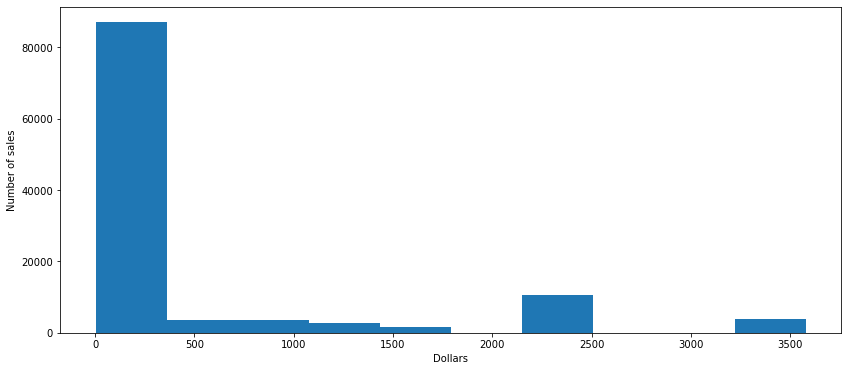

In [14]:
ax=Sales['Unit_Price'].plot(kind='hist',figsize=(14,6))
ax.set_ylabel('Number of sales')
ax.set_xlabel('Dollars')

In [15]:
#Categorical analysis and Visualization

In [16]:
Sales['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

<AxesSubplot:>

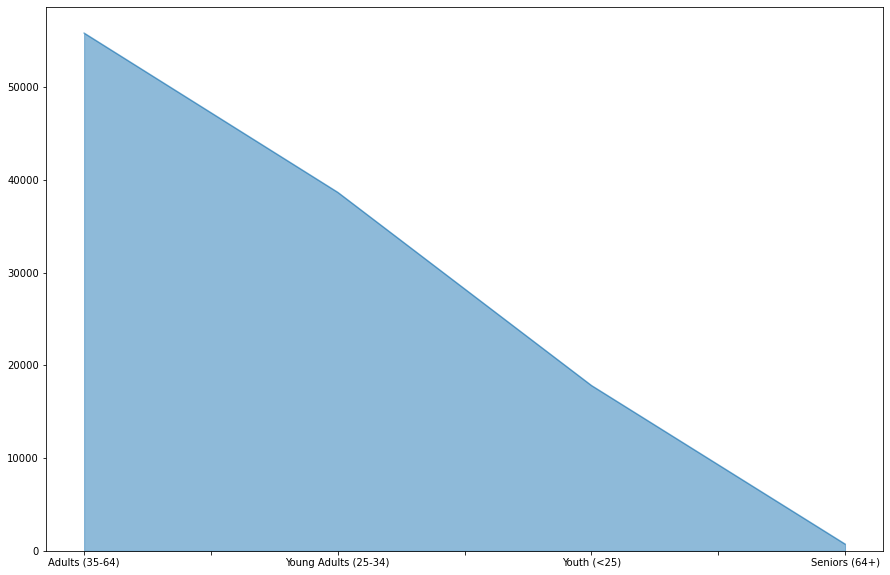

In [17]:
Sales['Age_Group'].value_counts().plot(kind='area', stacked=False, figsize=(15,10))

Text(0, 0.5, 'Number of sales')

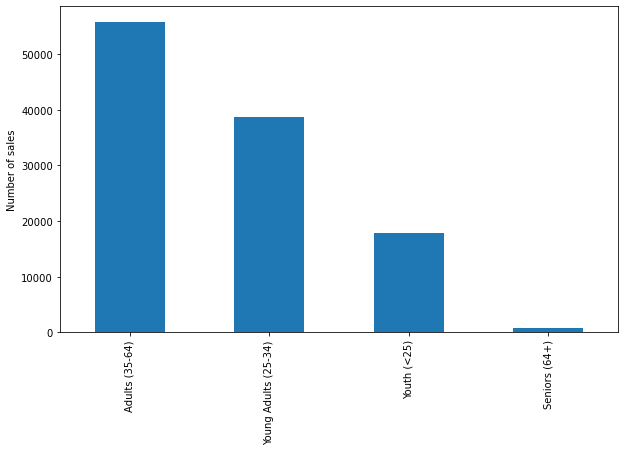

In [18]:
ax=Sales['Age_Group'].value_counts().plot(kind='bar',figsize=(10,6))
ax.set_ylabel('Number of sales')

In [19]:
import seaborn as sns

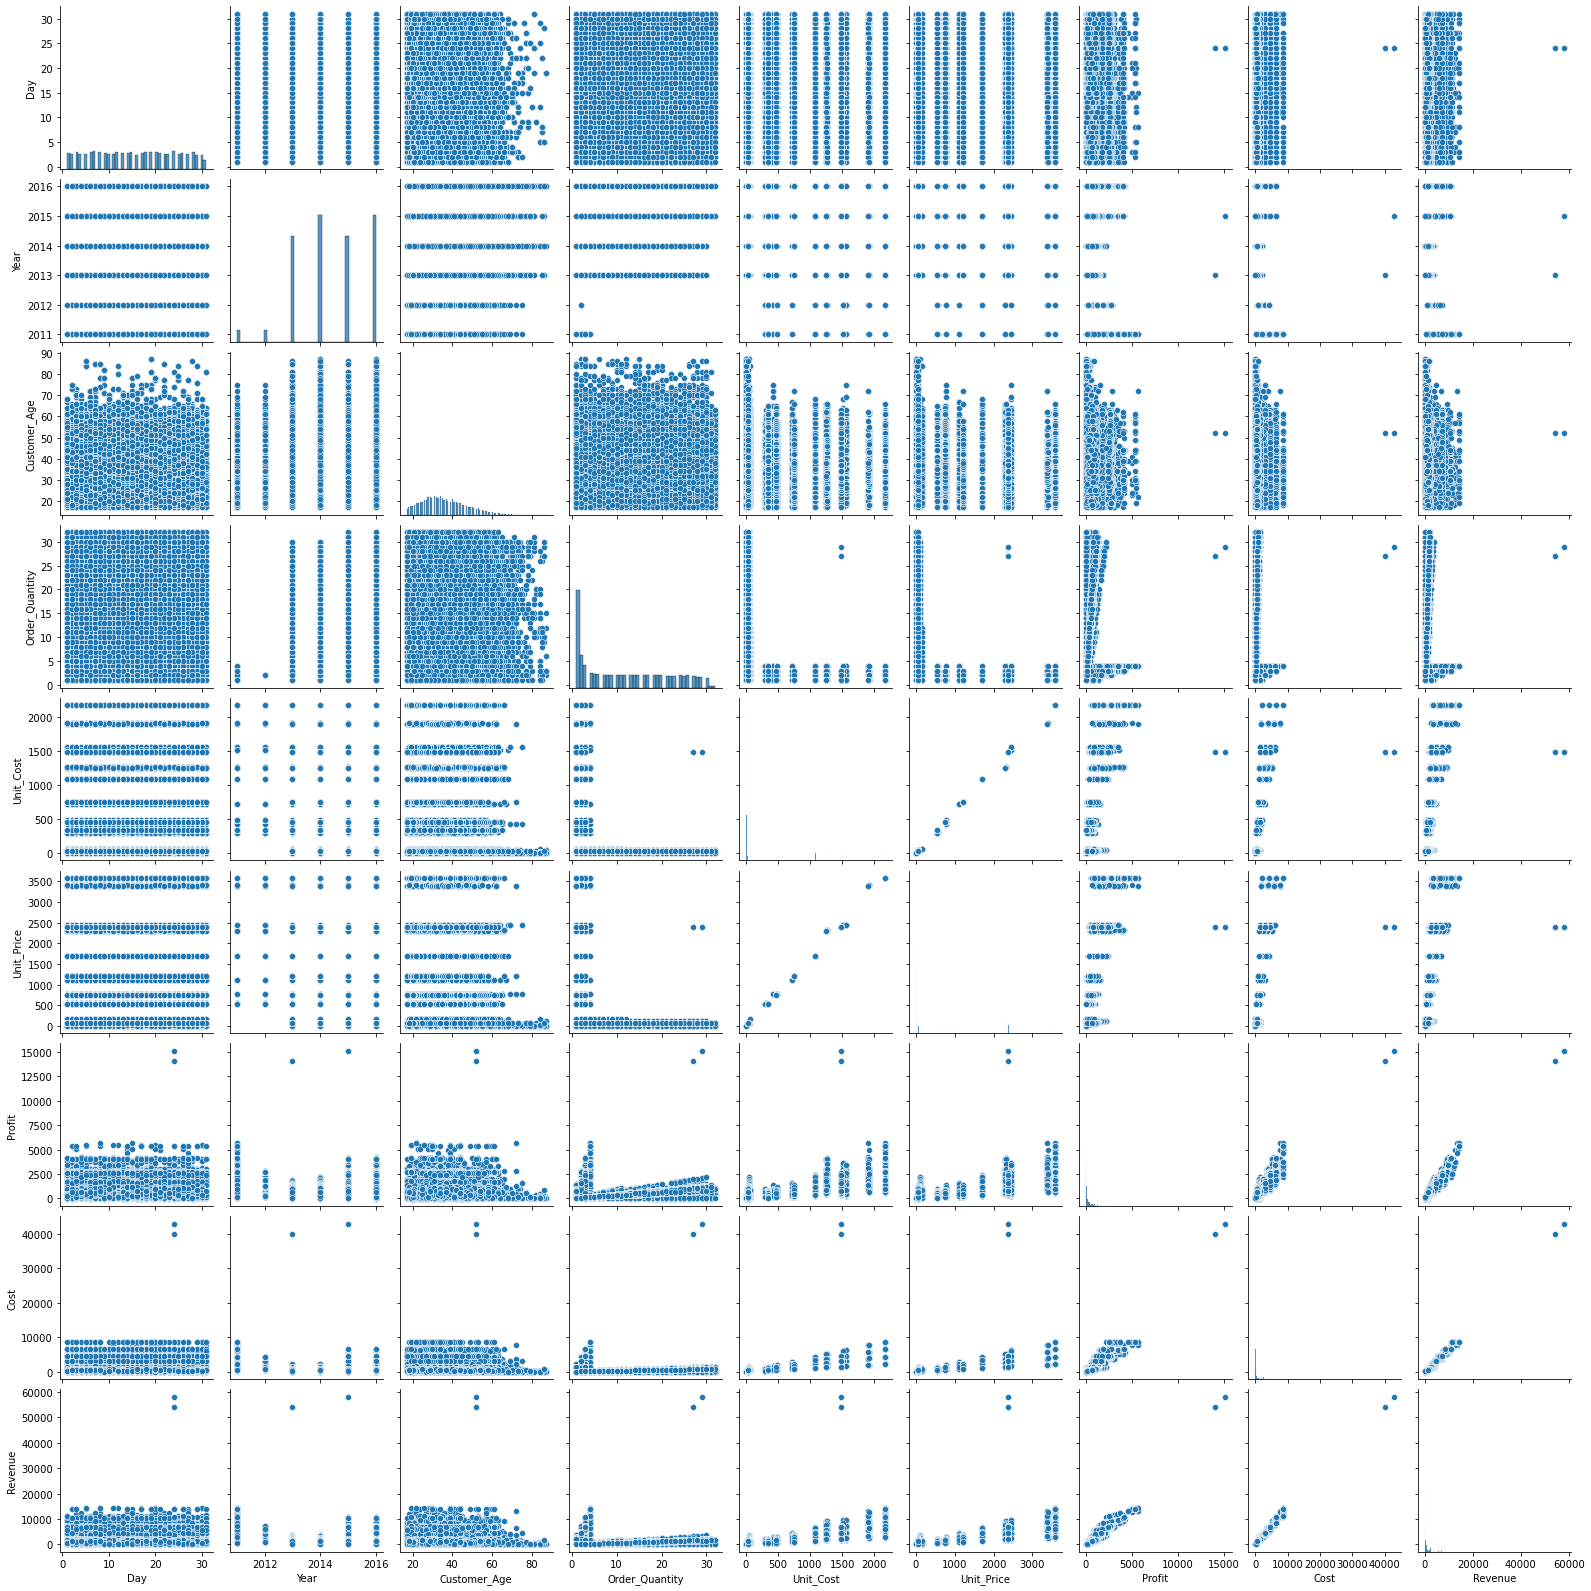

In [20]:
sns.pairplot(Sales, kind='scatter')
plt.show()

# Relationship between columns

In [21]:
corr=Sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


# Measuring Skewness
It used to determine whether the data is symmetric or skewed. If the index is between -1 and 1, then the distribution is symmetric. If the index is no more than -1 then it is skewed to the left and if it is at least 1, then it is skewed to the right

In [22]:
print(Sales.skew())

Day               0.013722
Year             -0.371120
Customer_Age      0.525300
Order_Quantity    0.378179
Unit_Cost         2.111548
Unit_Price        2.088041
Profit            4.002662
Cost              5.083239
Revenue           4.670908
dtype: float64


C:\Users\Ken Bwire\AppData\Local\Temp\ipykernel_15880\640513807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Sales.skew())


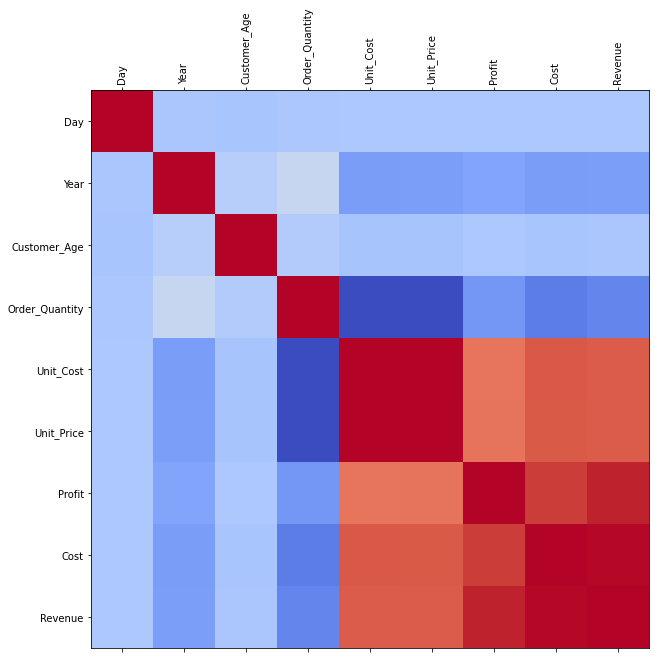

In [23]:
fig= plt.figure(figsize=(10,10))
plt.matshow(corr, cmap="coolwarm",fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)),corr.columns);

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Cost', ylabel='Revenue'>

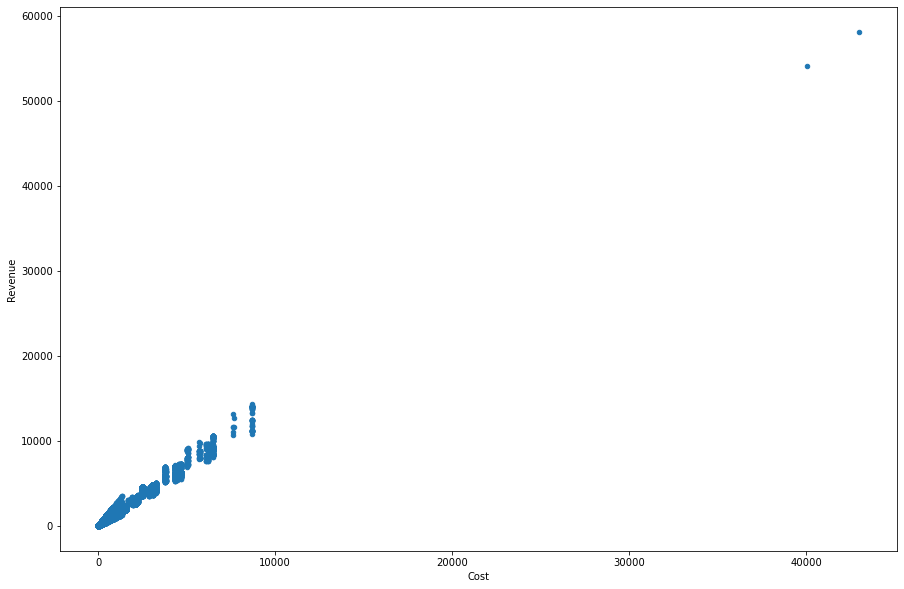

In [25]:
Sales.plot(kind='scatter',x='Cost',y='Revenue',figsize=(15,10))

Text(0, 0.5, 'Profit')

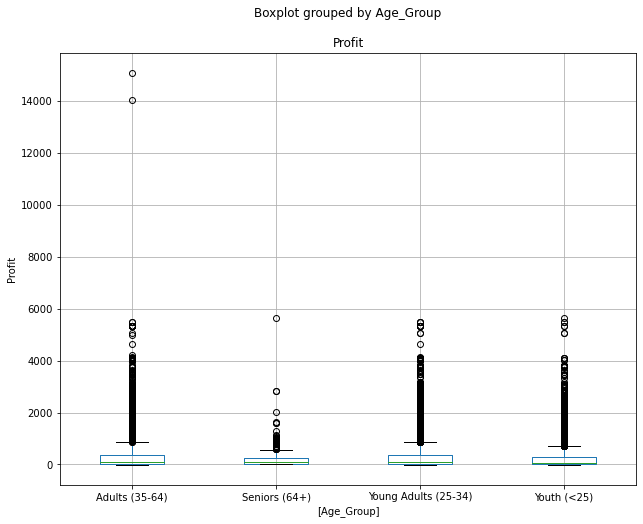

In [26]:
ax= Sales[['Profit','Age_Group']].boxplot(by='Age_Group',figsize=(10,8))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

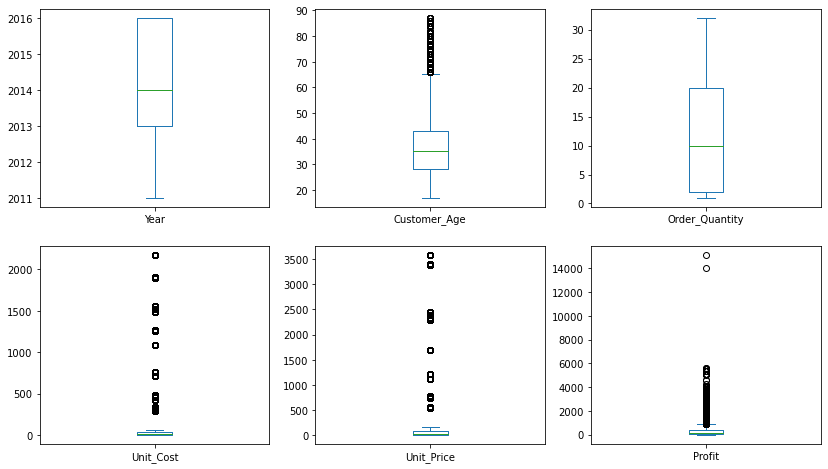

In [27]:
boxplot_cols=['Year','Customer_Age','Order_Quantity','Unit_Cost','Unit_Price','Profit']
Sales[boxplot_cols].plot(kind='box',subplots='True',layout=(2,3),figsize=(14,8))


#Column Wrangling
Wecan create new columns or modify the exisiting ones

In [28]:
#Add and calculate the Revenue_per_Age group

In [29]:
Sales['Revenue_per_Age']= Sales['Revenue']/Sales["Customer_Age"]
Sales['Revenue_per_Age'].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

<AxesSubplot:ylabel='Density'>

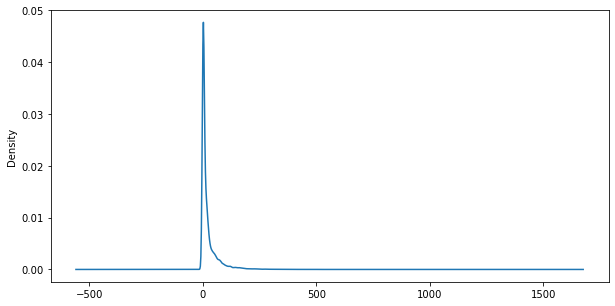

In [30]:
Sales['Revenue_per_Age'].plot(kind="density",figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

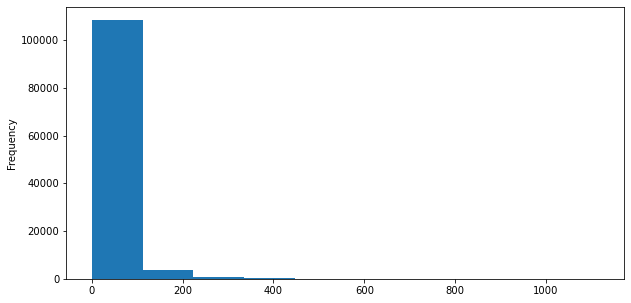

In [31]:
Sales['Revenue_per_Age'].plot(kind='hist',figsize=(10,5))